In [1]:
import numpy as np


In [2]:
from pathlib import Path

output_folder = Path("D:/reflectdetect/example_apriltag_dataset/debug/intensity")
assert output_folder.exists()
number_of_images = 273
number_of_panels = 3
bands = [2, 4]
number_of_bands = len(bands)

In [13]:
from reflectdetect.constants import COMPRESSION_FACTOR

intensities = np.zeros((number_of_images, number_of_panels, number_of_bands))
for i, band in enumerate(bands):
    filename = f"band_{band}_intensities.csv"
    input_path = output_folder / filename
    intensities[:, :, i] = np.genfromtxt(input_path, delimiter=",")
interpolated_intensities = np.zeros((number_of_images, number_of_panels, number_of_bands))
for i, band in enumerate(bands):
    filename = f"band_{band}_intensities_interpolated.csv"
    input_path = output_folder / filename
    interpolated_intensities[:, :, i] = np.genfromtxt(input_path, delimiter=",")
intensities = intensities/COMPRESSION_FACTOR
interpolated_intensities = interpolated_intensities/COMPRESSION_FACTOR
output_path = output_folder / f"intensities_paper.tif"


In [14]:
from matplotlib import pyplot as plt
import scienceplots
plt.style.use('science')
plt.rcParams.update({'font.size': 22})

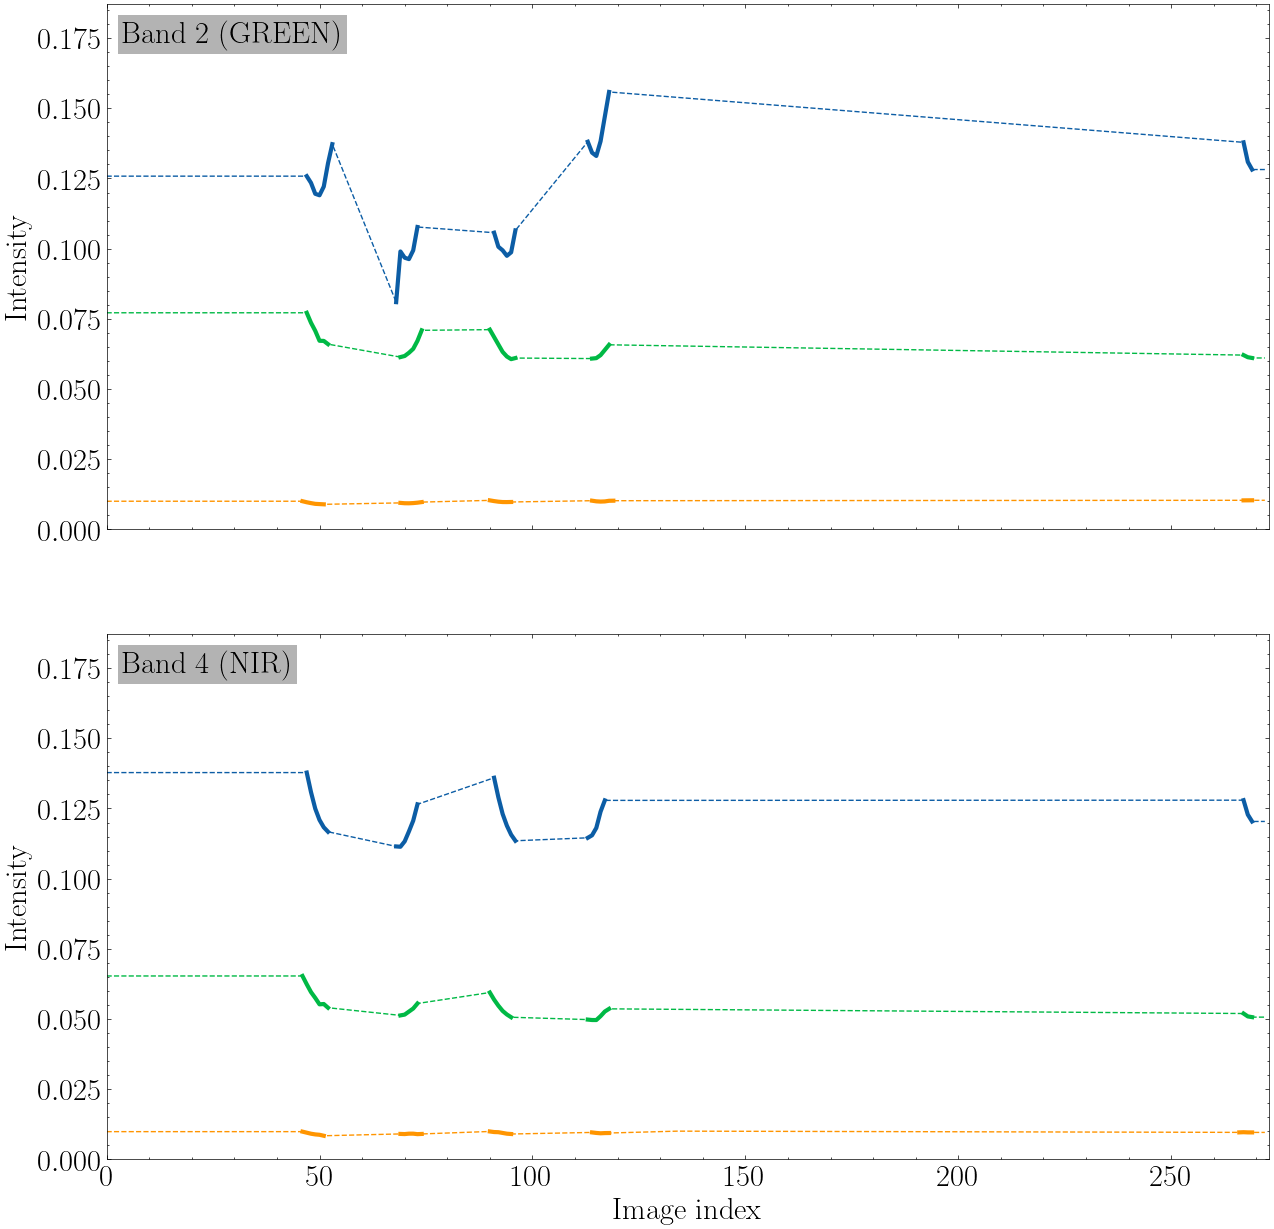

In [22]:
number_of_bands = len(intensities[0, 0, :])
fig, axes = plt.subplots(number_of_bands, sharex=True, figsize=(15, 15))
max_intensity = np.nanmax(intensities)
names = ["GREEN", "NIR"]
for i, (band, ax) in enumerate(zip(bands, axes)):
    ax.set_ylim([0, max_intensity * 1.2])
    ax.set_ylabel("Intensity")
    ax.annotate(
        "Band " + str(band) + " ("+names[i]+")",
        xy=(0, 1),
        xycoords="axes fraction",
        xytext=(+0.5, -0.5),
        textcoords="offset fontsize",
        fontsize="medium",
        verticalalignment="top",
        fontfamily="serif",
        bbox=dict(facecolor="0.7", edgecolor="none", pad=3.0),
    )
    number_of_panels = len(intensities[0, :, 0])
    for panel_index in range(0, number_of_panels):
        line, = ax.plot(interpolated_intensities[:, panel_index, i], ls='--', lw=1)
        ax.plot(intensities[:, panel_index, i], color=line.get_color(), lw=3)
plt.xlabel("Image index")
number_of_images = len(intensities[:, 0, 0])
plt.xlim([0, number_of_images])
plt.savefig(output_path, dpi=300)
plt.savefig(output_path.as_posix()+".png", dpi=300)
plt.show()